#Importando Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Trabalhando as imagens

In [137]:
imagem_zoio = '/home/rafaelfabrichimidt/Documentos/projetos/processamento_imagens_digitais/Aula 2/c.jpg' 

In [138]:
img_1 = cv2.imread(imagem_zoio)

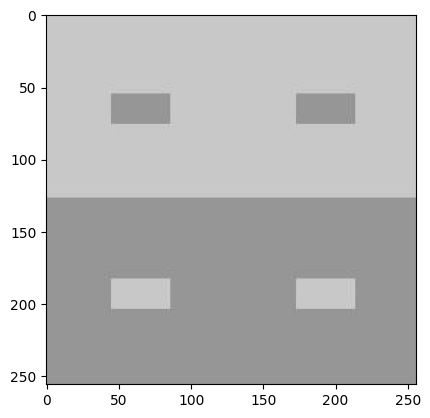

In [139]:
plt.imshow(img_1)

In [140]:
img_1.shape

(256, 256, 3)

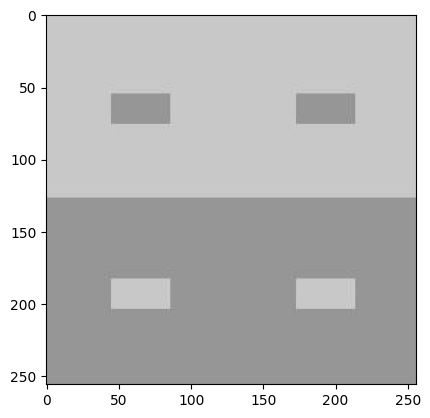

In [141]:
plt.imshow(img_1)

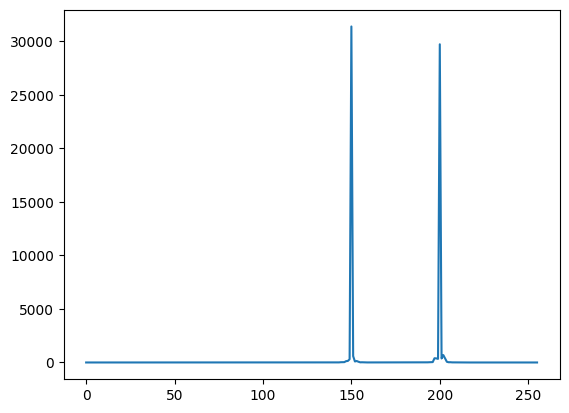

In [142]:
histogram = cv2.calcHist([img_1], [0], None, [256], [0, 256])

plt.plot(histogram)

#Taxa de Amostragem e Profundidade

In [143]:
#Encontrando a taxa de amostragem da imagem

img_cinza = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_cinza_array = np.array(img_cinza)

sampling_rate = img_cinza_array.shape

print(sampling_rate)

(256, 256)


In [144]:
img_cinza_array.dtype

dtype('uint8')

#Imagem Binária

In [145]:
img_1binaria = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_1binaria_ = cv2.threshold(img_1binaria, 150, 200, cv2.THRESH_BINARY)[1]

img_1array = np.array(img_1binaria_)

print(img_1array)

[[200 200 200 ... 200 200 200]
 [200 200 200 ... 200 200 200]
 [200 200 200 ... 200 200 200]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [146]:
img_1array[img_1array >= 200] = 255
img_1array[img_1array < 200] = 0

print(img_1array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


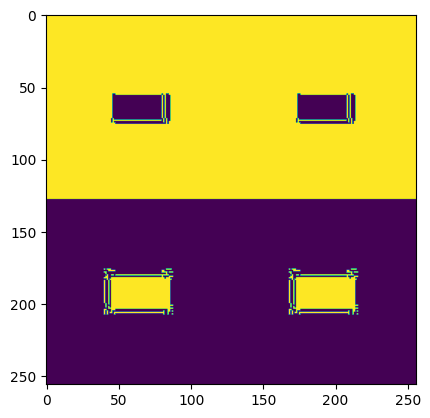

In [224]:
img_binarizada = img_1array

plt.imshow(img_binarizada)

In [225]:
print(img_binarizada)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [229]:
img_binarizada[img_binarizada == 255] = 1
img_binarizada[img_binarizada == 0] = 0

print(img_binarizada)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


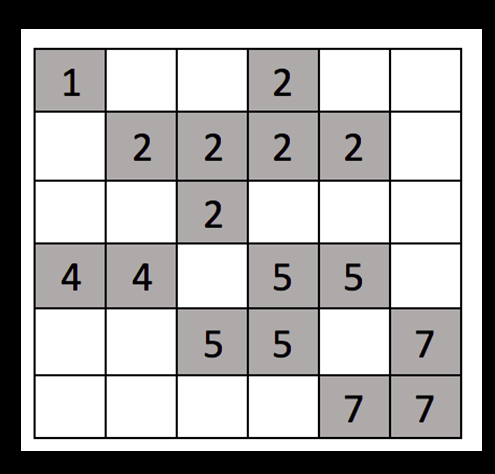

In [246]:
def Hoshen_Kopelman_Algorithm_4d(matriz):
    labels = np.zeros((matriz.shape))
    label = 0
    img_binarizada = matriz
    for i in range(0, img_binarizada.shape[0], 1):
    
        for j in range(0, img_binarizada.shape[1], 1):
            celula_ocupada = 0
        
            #Verificar se indice atual esta ocupado
            if img_binarizada[i][j] != 0:
                celula_ocupada = 1        
        
            #possui vizinhos preenchidos
            if celula_ocupada != 0:

                #vizinho superior ja preenchido
                if (i >= 0) and labels[i - 1, j] != 0:
                    labels[i,j] = int(labels[i - 1, j]) 
        
                    if labels[i - 1, j] < label:
                        labels[labels == (label)] = labels[i - 1, j] 

                #vizinho a esquerda ja preenchido
                elif (j >= 0) and labels[i, j - 1] != 0:
                    labels[i,j] = labels[i, j - 1] 
                    
                    if labels[i, j - 1] < label:
                        labels[labels == (label)] = labels[i - 1, j]
        
                else:
                    label = label + 1
                    labels[i,j] = label
            
            
    return labels

In [243]:
def Hoshen_Kopelman_Algorithm_8d(matriz):
    labels = np.zeros((matriz.shape))
    label = 0
    img_binarizada = matriz
    for i in range(0, img_binarizada.shape[0], 1):
    
        for j in range(0, img_binarizada.shape[1], 1):
            celula_ocupada = 0
        
            #Verificar se indice atual esta ocupado
            if img_binarizada[i][j] != 0:
                celula_ocupada = 1        
        
            #possui vizinhos preenchidos
            if celula_ocupada != 0:

                #vizinho superior ja preenchido
                if ( (i - 1) >= 0) and labels[i - 1, j] != 0:
                    labels[i,j] = int(labels[i - 1, j]) 
        
                    if labels[i - 1, j] < label:
                        labels[labels == (label)] = labels[i - 1, j] 

                #vizinho a esquerda ja preenchido
                elif ( (j - 1) >= 0 ) and labels[i, j - 1] != 0:
                    labels[i,j] = labels[i, j - 1] 
                    
                    if labels[i, j - 1] < label:
                        labels[labels == (label)] = labels[i - 1, j]

                #canto superior esquerdo ja preenchido
                elif ( (i - 1) >= 0) and labels[i - 1, j - 1] != 0:
                    labels[i,j] = labels[i - 1, j - 1] 
                    
                    if labels[i - 1, j - 1] < label:
                        labels[labels == (label)] = labels[i - 1, j - 1]

                #canto superior direito ja preenchido
                elif (j >= 0) and labels[i - 1, j + 1] != 0:
                    labels[i,j] = labels[i - 1, j + 1] 
                    
                    if labels[i - 1, j + 1] < label:
                        labels[labels == (label)] = labels[i - 1, j + 1]
        
                else:
                    label = label + 1
                    labels[i,j] = label
            
            
    return labels

In [247]:
matriz = [[1,0,0,1,0,0],
          [0,1,1,1,1,0],
          [0,0,1,0,0,0],
          [1,1,0,1,1,0],
          [0,0,1,1,0,1],
          [0,0,0,0,1,1]]

matriz = np.array(matriz)
matriz

labels = Hoshen_Kopelman_Algorithm_4d(matriz)
labels

array([[1., 0., 0., 2., 0., 0.],
       [0., 2., 2., 2., 2., 0.],
       [0., 0., 2., 0., 0., 0.],
       [4., 4., 0., 5., 5., 0.],
       [0., 0., 5., 5., 0., 7.],
       [0., 0., 0., 0., 7., 7.]])

In [248]:
matriz = [[1,0,0,1,0,0],
          [0,1,1,1,1,0],
          [0,0,1,0,0,0],
          [1,1,0,1,1,0],
          [0,0,1,1,0,1],
          [0,0,0,0,1,1]]

matriz = np.array(matriz)
matriz

labels = Hoshen_Kopelman_Algorithm_8d(matriz)
labels

array([[1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1.]])

In [249]:
labels = Hoshen_Kopelman_Algorithm_8d(img_binarizada)
labels

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [251]:
len(np.unique(labels))

12

In [252]:
labels

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

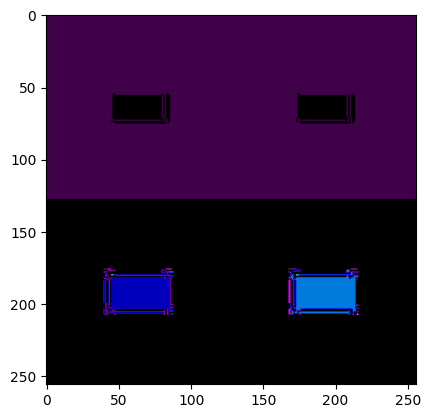

In [253]:
plt.imshow(labels, cmap = 'nipy_spectral')